In [1]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind, wilcoxon
import seaborn as sn

from util import exclude_sites_tamap
from util import column_stats
from util import get_read_columns
from util import total_count_norm, quantile_norm, ttr_norm, nzmean_norm
from util import tamap_to_genehits
from util import calc_sample_fitness, calc_survival_index

In [2]:
experiment = "m1"
index = "14028c"
output = "explore"
output_folder = "../data/{}/analysis/{}".format(experiment, output)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [3]:
tamap_filename = "../data/{}/maps/{}_TAmaps.csv".format(experiment, index)
tamap = pd.read_csv(tamap_filename, delimiter=",")

In [4]:
# Synthetically drop some of the values
drop_p = 0.3
mask = lambda p: np.random.choice([0, 1], size=(len(tamap),), p=[p, 1-p])

tamap["cf1_drop1_both"] = mask(drop_p)*np.array(tamap["cf1_S3_L001_R1_001_both"])
tamap["cf1_drop2_both"] = mask(drop_p)*np.array(tamap["cf1_S3_L001_R1_001_both"])
tamap["cf1_drop3_both"] = mask(drop_p)*np.array(tamap["cf1_S3_L001_R1_001_both"])

tamap["cf2_drop1_both"] = mask(drop_p)*np.array(tamap["cf2_S4_L001_R1_001_both"])
tamap["cf2_drop2_both"] = mask(drop_p)*np.array(tamap["cf2_S4_L001_R1_001_both"])
tamap["cf2_drop3_both"] = mask(drop_p)*np.array(tamap["cf2_S4_L001_R1_001_both"])

tamap["pt1_drop1_both"] = mask(drop_p)*np.array(tamap["pt1_S1_L001_R1_001_both"])
tamap["pt1_drop2_both"] = mask(drop_p)*np.array(tamap["pt1_S1_L001_R1_001_both"])
tamap["pt1_drop3_both"] = mask(drop_p)*np.array(tamap["pt1_S1_L001_R1_001_both"])

tamap["pt2_drop1_both"] = mask(drop_p)*np.array(tamap["pt2_S2_L001_R1_001_both"])
tamap["pt2_drop2_both"] = mask(drop_p)*np.array(tamap["pt2_S2_L001_R1_001_both"])
tamap["pt2_drop3_both"] = mask(drop_p)*np.array(tamap["pt2_S2_L001_R1_001_both"])

# Eclude sites at the beginning and end of genes
# tamap["excl05_both"] = exclude_sites_tamap(tamap, exclude_first=0.05, exclude_last=0.05)["pt2_S2_L001_R1_001_both"]
# tamap["excl10_both"] = exclude_sites_tamap(tamap, exclude_first=0.1, exclude_last=0.1)["pt2_S2_L001_R1_001_both"]
# tamap["first10_both"] = exclude_sites_tamap(tamap, exclude_first=0.1, exclude_last=0.0)["pt2_S2_L001_R1_001_both"]
# tamap["last10_both"] = exclude_sites_tamap(tamap, exclude_first=0.0, exclude_last=0.1)["pt2_S2_L001_R1_001_both"]

In [5]:
get_read_columns(tamap)

['cf1_S3_L001_R1_001_forward',
 'cf1_S3_L001_R1_001_reverse',
 'cf1_S3_L001_R1_001_both',
 'cf2_S4_L001_R1_001_forward',
 'cf2_S4_L001_R1_001_reverse',
 'cf2_S4_L001_R1_001_both',
 'pt1_S1_L001_R1_001_forward',
 'pt1_S1_L001_R1_001_reverse',
 'pt1_S1_L001_R1_001_both',
 'pt2_S2_L001_R1_001_forward',
 'pt2_S2_L001_R1_001_reverse',
 'pt2_S2_L001_R1_001_both',
 'cf1_drop1_both',
 'cf1_drop2_both',
 'cf1_drop3_both',
 'cf2_drop1_both',
 'cf2_drop2_both',
 'cf2_drop3_both',
 'pt1_drop1_both',
 'pt1_drop2_both',
 'pt1_drop3_both',
 'pt2_drop1_both',
 'pt2_drop2_both',
 'pt2_drop3_both']

In [6]:
# Make the groups as a dictionary
# The key is a string which will prefix the column names
# The value is a list of strings which are the replicate names in the tamap
groups = {
    "t0": ["cf1_drop1_both", "cf1_drop2_both", "cf1_drop3_both"],
    "t1": ["cf2_drop1_both", "cf2_drop2_both", "cf2_drop3_both"],
    "t2": ["pt2_drop1_both", "pt2_drop2_both", "pt2_drop3_both"],
    "t3": ["pt1_drop1_both", "pt1_drop2_both", "pt1_drop3_both"],
}
# Combine the reads into one list
read_columns = []
[read_columns.extend(v) for v in groups.values()]
group_columns = list(groups.keys())
print("read_columns :", read_columns)
print("group_columns :", group_columns)

read_columns : ['cf1_drop1_both', 'cf1_drop2_both', 'cf1_drop3_both', 'cf2_drop1_both', 'cf2_drop2_both', 'cf2_drop3_both', 'pt2_drop1_both', 'pt2_drop2_both', 'pt2_drop3_both', 'pt1_drop1_both', 'pt1_drop2_both', 'pt1_drop3_both']
group_columns : ['t0', 't1', 't2', 't3']


In [7]:
# tamap = total_count_norm(tamap, columns=read_columns)
# tamap = quantile_norm(tamap, q=0.75, columns=read_columns)
tamap = ttr_norm(tamap, trim=0.05, columns=read_columns)
# tamap = nzmean_norm(tamap, columns=read_columns)
column_stats(tamap, columns=read_columns)


Column Stats : cf1_drop1_both
Sum=3089735.5987.
Min=0.0000. Max=11450.4174. Median=0.0000.
Mean=13.246. Non-Zero Mean=63.226

Column Stats : cf1_drop2_both
Sum=3074879.2396.
Min=0.0000. Max=11248.7064. Median=0.0000.
Mean=13.182. Non-Zero Mean=62.963

Column Stats : cf1_drop3_both
Sum=3107133.2225.
Min=0.0000. Max=11740.8655. Median=0.0000.
Mean=13.321. Non-Zero Mean=63.888

Column Stats : cf2_drop1_both
Sum=1947104.8312.
Min=0.0000. Max=7154.1981. Median=0.0000.
Mean=8.347. Non-Zero Mean=48.154

Column Stats : cf2_drop2_both
Sum=1947292.5668.
Min=0.0000. Max=7164.1397. Median=0.0000.
Mean=8.348. Non-Zero Mean=48.211

Column Stats : cf2_drop3_both
Sum=1940896.0000.
Min=0.0000. Max=7093.0000. Median=0.0000.
Mean=8.321. Non-Zero Mean=48.011

Column Stats : pt2_drop1_both
Sum=2608630.9582.
Min=0.0000. Max=26179.4445. Median=0.0000.
Mean=11.183. Non-Zero Mean=70.908

Column Stats : pt2_drop2_both
Sum=2578948.8091.
Min=0.0000. Max=25365.0948. Median=0.0000.
Mean=11.056. Non-Zero Mean=70.10

In [8]:
genehits = tamap_to_genehits(tamap, pooling="sum")  # sum, average

In [9]:
# Calculate the group stats after combining the group
for k in groups.keys():
    v = groups[k]
    label = lambda x: k+"_"+x  # Prepend the key to new labels
    # Combine by averaging
    tamap[k] = tamap[v].mean(axis=1)
    genehits[k] = genehits[v].mean(axis=1)

    # Calculate the insertion density for each group
    # Need remove intergenic and group by gene
    temp = tamap[tamap['Gene_ID'].notna()].copy()
    temp[k] = temp[v].mean(axis=1).astype(bool)  # Combine
    grouped = temp.groupby("Gene_ID", as_index=False).sum()
    # Unique_Insertions : Unique TA hits / TA Sites
    # Diversity = Unique_Insertions / TA_Counts
    genehits[k+"_Unique_Insertions"] = grouped[k]
    genehits[k+"_Diversity"] = genehits[k+"_Unique_Insertions"] / genehits["TA_Count"]
    # Don't need these anymore
    del temp, grouped

In [10]:
# Unique combinations of the groups
pairs = [(group_columns[i], group_columns[j]) for i in range(len(groups)) for j in range(i+1, len(groups))]

In [11]:
# Differential statistics for each pair
smoothing = 1
expansion = 250
for x, y in pairs:
    base = x+"_"+y
    # Read Ratio
    genehits[base+"_Ratio_Reads"] = (genehits[y]+smoothing) / (genehits[x]+smoothing)
    genehits[base+"_Log2FC_Reads"] = np.log2(genehits[base+"_Ratio_Reads"])
    # Insertion Ratio
    # genehits[base+"_Ratio_Inserts"] = (genehits[y+"_Unique_Insertions"]+smoothing) / (genehits[x+"_Unique_Insertions"]+smoothing)
    # genehits[base+"_Log2FC_Reads"] = np.log2(genehits[base+"_Ratio_Inserts"])
    # Fitness
    # genehits[base+"_Fitness"] = calc_sample_fitness(genehits, control=x, sample=y, expansion=expansion)
    # Survival Index
    # si = calc_survival_index(genehits, control=x, sample=y)
    # genehits[base+"_Survival_Index"] = si
    # genehits[base+"_Log2SI"] = np.log2(si, out=np.zeros_like(si), where=(si!=0))

In [12]:
min_count = 1
min_inserts = 2
min_sites = 0
cols_inserts = [x+"_Unique_Insertions" for x in group_columns]
# This bool saves whether the gene has counts in all groups
hit_bool = ~(genehits[cols_inserts]==0).any(axis=1)
num_hit = hit_bool.sum()
print("{}/{}({:.2f}%) had no insertions".format( len(genehits)-num_hit, len(genehits), 100*(len(genehits)-num_hit)/len(genehits) ))
print("{}/{}({:.2f}%) had at least one insertion.".format( num_hit, len(genehits), 100*num_hit/len(genehits) ))
# Create boolean columns for user defined thresholds
keep_count = (genehits[group_columns] >= min_count).all(axis=1)
keep_inserts = (genehits[cols_inserts] >= min_inserts).all(axis=1)
keep_sites = (genehits["TA_Count"] >= min_sites)
keep = keep_count & keep_inserts & keep_sites
# Separate the genes that will be tested from the rest
trimmed = genehits[keep&hit_bool].copy()
removed = genehits[~keep&hit_bool].copy()
print(" * Thresholds: min_count={}. min_inserts={}. min_sites={}.".format(min_count, min_inserts, min_sites))
print("{}/{}({:.2f}%) genes removed by threshold.".format(len(removed), len(genehits), 100*len(removed)/len(genehits)))
print("{}/{}({:.2f}%) genes remaining.".format(len(trimmed), len(genehits), 100*len(trimmed)/len(genehits)))

1388/5509(25.20%) had no insertions
4121/5509(74.80%) had at least one insertion.
 * Thresholds: min_count=1. min_inserts=2. min_sites=0.
767/5509(13.92%) genes removed by threshold.
3354/5509(60.88%) genes remaining.


In [13]:
for k in groups.keys():
    cols = groups[k]
    if len(cols)>1:
        data = tamap[cols].corr(method='pearson')
        data = np.array(data)
        coeffs = data[np.triu_indices_from(data, k=1)]
        print(f"{k} corr coeffs :", coeffs)
        m = np.mean(coeffs)
        print(f"{k} mean corr :", m)
    else:
        print(f"{k} had one sample")

t0 corr coeffs : [0.64860335 0.65097833 0.57882065]
t0 mean corr : 0.6261341114403038
t1 corr coeffs : [0.73945142 0.77061031 0.7984414 ]
t1 mean corr : 0.7695010438669229
t2 corr coeffs : [0.70789249 0.75324824 0.79285367]
t2 mean corr : 0.7513314671600199
t3 corr coeffs : [0.69297156 0.64056808 0.74510165]
t3 mean corr : 0.692880430063083


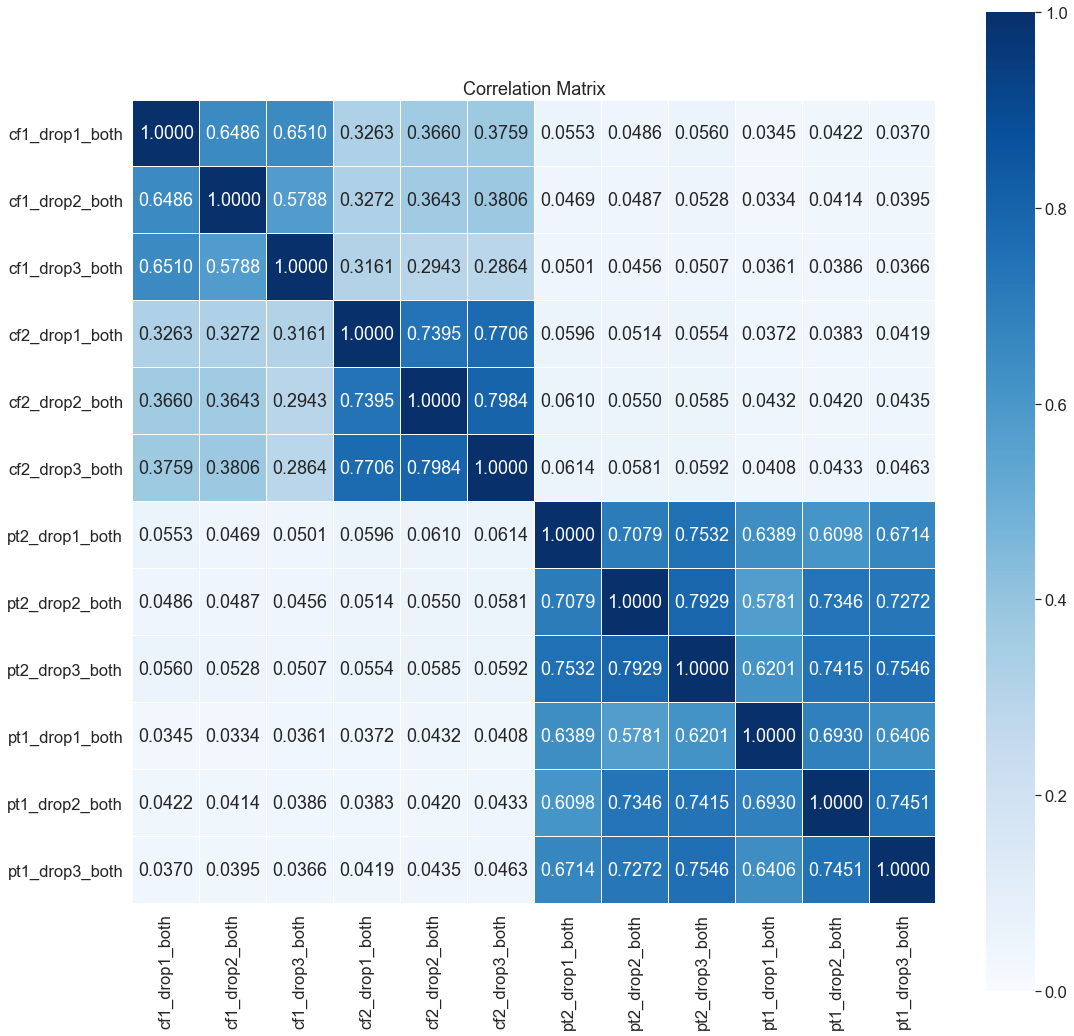

In [14]:
cols = read_columns  # group_columns, read_columns
scale = 1.5
data = tamap[cols].corr(method='pearson')  # pearson, kendall, spearman
plt.figure(figsize=(scale*len(cols), scale*len(cols)))
sn.set(font_scale=scale)  # Label size
sn.heatmap(data,
annot=True, fmt=".4f", annot_kws={"size": scale*12},
cmap='Blues',
vmin=0, vmax=1,
xticklabels=cols,  yticklabels=cols,
square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig(f"{output_folder}/reads_correlation.png", bbox_inches="tight")

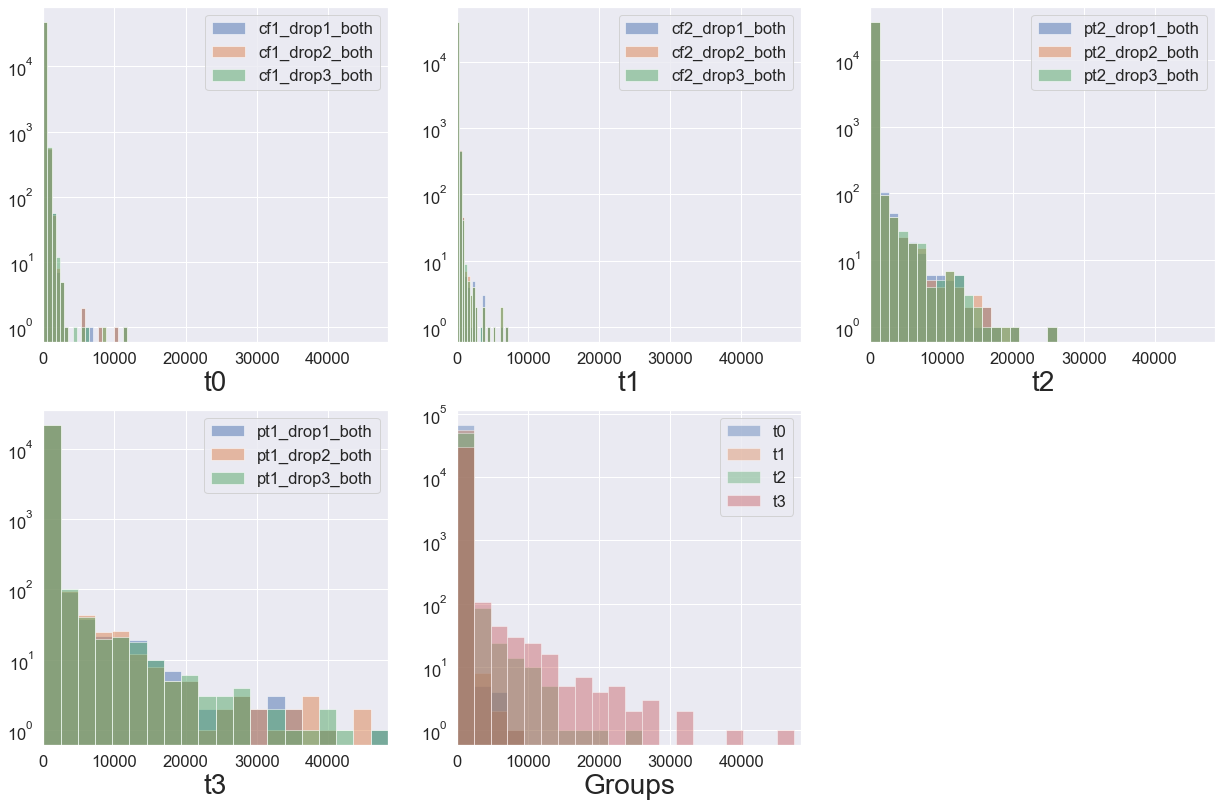

In [15]:
scale = 7
bins = 20
x_max = max(tamap[read_columns].max())
rr = int(np.ceil(np.sqrt(len(groups)+1)))
fig = plt.figure(figsize=[scale*rr, scale*rr])
# fig.suptitle("Hits per TA site", fontsize=scale*8)
for i, (k, v) in enumerate(groups.items()):
    fig.add_subplot(rr, rr, i+1)
    ax = plt.gca()
    df = tamap[v].copy().replace(0, np.NaN)
    df.plot.hist(bins=bins, ax=ax, alpha=0.5)
    ax.set_yscale('log')
    ax.set_ylabel("")
    ax.set_xlim([0, x_max])
    ax.set_xlabel(k, fontsize=scale*4)

fig.add_subplot(rr, rr, i+2)
ax = plt.gca()
df = tamap[group_columns].copy().replace(0, np.NaN)
df.plot.hist(bins=bins, ax=ax, alpha=0.4)
ax.set_yscale('log')
ax.set_ylabel("")
ax.set_xlim([0, x_max])
ax.set_xlabel("Groups", fontsize=scale*4)

plt.savefig(f"{output_folder}/reads_histogram.png", bbox_inches="tight")

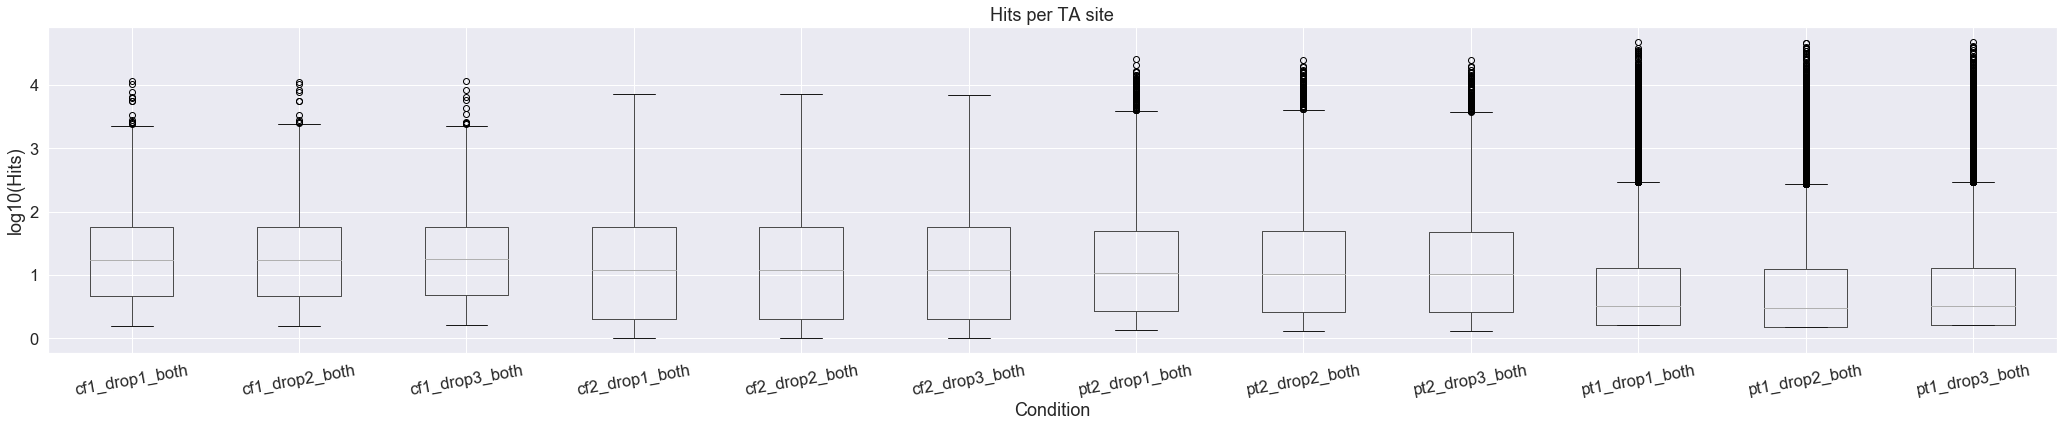

In [16]:
cols = read_columns  # group_columns, read_columns

fig = plt.figure(figsize=[3*len(cols), 6])
ax = fig.add_subplot(111)
np.log10(tamap[cols].copy().replace(0, np.NaN)).boxplot(column=cols, ax=ax, showfliers=True)
plt.title("Hits per TA site")
ax.set_xticklabels(cols, rotation = 10)
ax.set_xlabel("Condition")
ax.set_ylabel("log10(Hits)")
plt.savefig(f"{output_folder}/reads_boxplot.png", bbox_inches="tight")

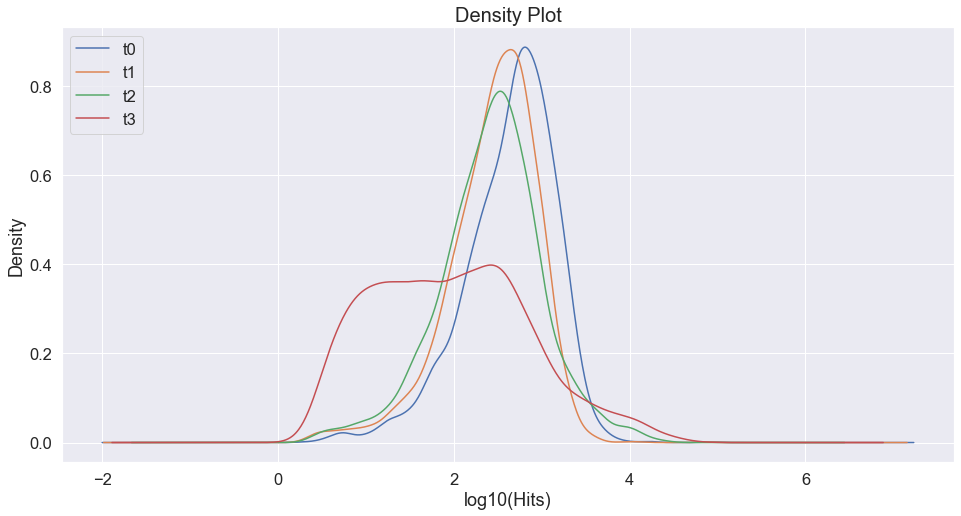

In [17]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111) 
ax.set_xlabel("log10(Hits)")
ax.set_title("Density Plot", fontsize=20)
df = np.log10(trimmed[group_columns].copy()+1)
df.plot.kde(ax=ax)
ax.legend(loc="upper left")
plt.savefig(f"{output_folder}/hits_density.png", bbox_inches="tight")

In [18]:
all_fc_cols = [x+"_"+y+"_Log2FC_Reads" for x,y in pairs]
first_fc_cols = all_fc_cols[:len(groups)-1]

In [19]:
from sklearn.decomposition import PCA
from scipy.cluster.vq import whiten

data = genehits[read_columns]
scaled = whiten(data).T
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled)
p = pca.fit(scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
genehits[["PC1", "PC2"]] = pd.DataFrame(loadings, index=genehits.index)
genehits.sort_values(by="PC1", ascending=False)

Gene_ID   Locus_Tag   Index    Start      End Direction  TA_Count  \
2169    acrE  STM14_4090  14028c  3575003  3576160         +        51   
3588    pduS  STM14_2542  14028c  2180288  2181643         +        38   
3340    misL  STM14_4527  14028c  3968453  3971320         +       160   
2966     gsk  STM14_0578  14028c   549691   550995         +        68   
4547    ybaE  STM14_0540  14028c   513124   514824         -        68   
...      ...         ...     ...      ...      ...       ...       ...   
4231    stiC  STM14_0207  14028c   205784   208330         -       124   
4226    sthB  STM14_5514  14028c  4862345  4864882         -       176   
2329    bigA  STM14_4188  14028c  3643029  3648923         +       256   
3665    pldA  STM14_4760  14028c  4175314  4176183         +        61   
2231    araE  STM14_3641  14028c  3195611  3197029         -        70   

      Gene_Length    GC  cf1_S3_L001_R1_001_forward  ...  t0_t3_Ratio_Reads  \
2169         1158  None                         205  ...          52.655942   
3588         1356  None                         320  ...          38.812396   
3340         2868  None                        3643  ...           6.845924   
2966         1305  None                         739  ...          22.927815   
4547         1701  None                         601  ...          23.551710   
...           ...   ...                         ...  ...                ...   
4231         2547  None                         891  ...           0.220188   
4226         2538  None                        3802  ...           0.099947   
2329         5895  None                        3121  ...           0.199263   
3665          870  None                        6813  ...           0.124308   
2231         1419  None                       38530  ...           0.006557   

      t0_t3_Log2FC_Reads  t1_t2_Ratio_Reads  t1_t2_Log2FC_Reads  \
2169            5.718524          31.289030            4.967585   
3588            5.278446          71.539798            6.160674   
3340            2.775245           5.368803            2.424600   
2966            4.519027          12.416978            3.634242   
4547            4.557760          10.944108            3.452082   
...                  ...                ...                 ...   
4231           -2.183195           0.627535           -0.672233   
4226           -3.322699           0.855715           -0.224799   
2329           -2.327257           0.876197           -0.190672   
3665           -3.008010           0.265237           -1.914646   
2231           -7.252656           0.021545           -5.536515   

      t1_t3_Ratio_Reads  t1_t3_Log2FC_Reads  t2_t3_Ratio_Reads  \
2169          72.937616            6.188591           2.331092   
3588          74.137863            6.212139           1.036316   
3340           9.111012            3.187611           1.697028   
2966          46.684092            5.544859           3.759698   
4547          24.401769            4.608914           2.229672   
...                 ...                 ...                ...   
4231           0.598487           -0.740607           0.953712   
4226           0.327566           -1.610144           0.382798   
2329           0.451547           -1.147051           0.515349   
3665           0.162639           -2.620252           0.613185   
2231           0.007408           -7.076655           0.343852   

      t2_t3_Log2FC_Reads        PC1       PC2  
2169            1.221006   8.879435  0.987105  
3588            0.051464   7.678596 -4.718722  
3340            0.763011   5.985108  1.692179  
2966            1.910617   5.819748  2.389073  
4547            1.156831   5.603835  0.524142  
...                  ...        ...       ...  
4231           -0.068374  -1.273319 -0.262785  
4226           -1.385345  -1.334663 -0.447318  
2329           -0.956379  -1.690991 -0.632860  
3665           -0.705606  -5.158753 -0.498670  
2231           -1.540141 -33.279961  0.31

In [20]:
df = pd.DataFrame(data=pc, columns=["PC1", "PC2"])
df["Read"] = read_columns
df

PC1        PC2            Read
0  -44.003128  -0.635725  cf1_drop1_both
1  -42.911365  -2.009074  cf1_drop2_both
2  -41.214905  -3.306895  cf1_drop3_both
3  -45.207860   2.093031  cf2_drop1_both
4  -45.022945   1.665516  cf2_drop2_both
5  -45.670380   3.077501  cf2_drop3_both
6   40.386847 -16.845257  pt2_drop1_both
7   42.611849 -17.207168  pt2_drop2_both
8   44.079264 -16.666865  pt2_drop3_both
9   43.235639  35.932683  pt1_drop1_both
10  47.027310  15.502602  pt1_drop2_both
11  46.689674  -1.600349  pt1_drop3_both

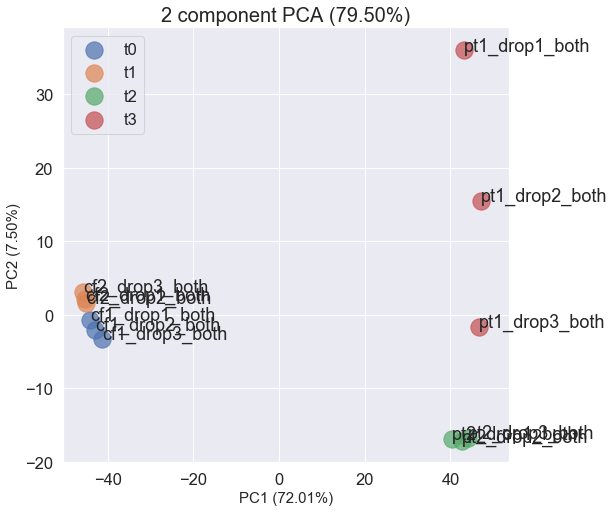

In [21]:
rx, ry = 100*pca.explained_variance_ratio_
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111) 
ax.set_xlabel(f'PC1 ({rx:.2f}%)', fontsize=15)
ax.set_ylabel(f'PC2 ({ry:.2f}%)', fontsize=15)
ax.set_title(f'2 component PCA ({rx+ry:.2f}%)', fontsize=20)
for k, v in groups.items():
    subset = df[df["Read"].isin(v)]
    ax.scatter(subset["PC1"], subset["PC2"], s=300, alpha=0.7, label=k)
ax.legend()
for index, r in df.iterrows(): ax.annotate(r["Read"], (r["PC1"], r["PC2"]))

ax.grid(linestyle='-')
plt.savefig(f"{output_folder}/pca.png", bbox_inches="tight")

(50, 12)
size : (24, 14.285714285714286)


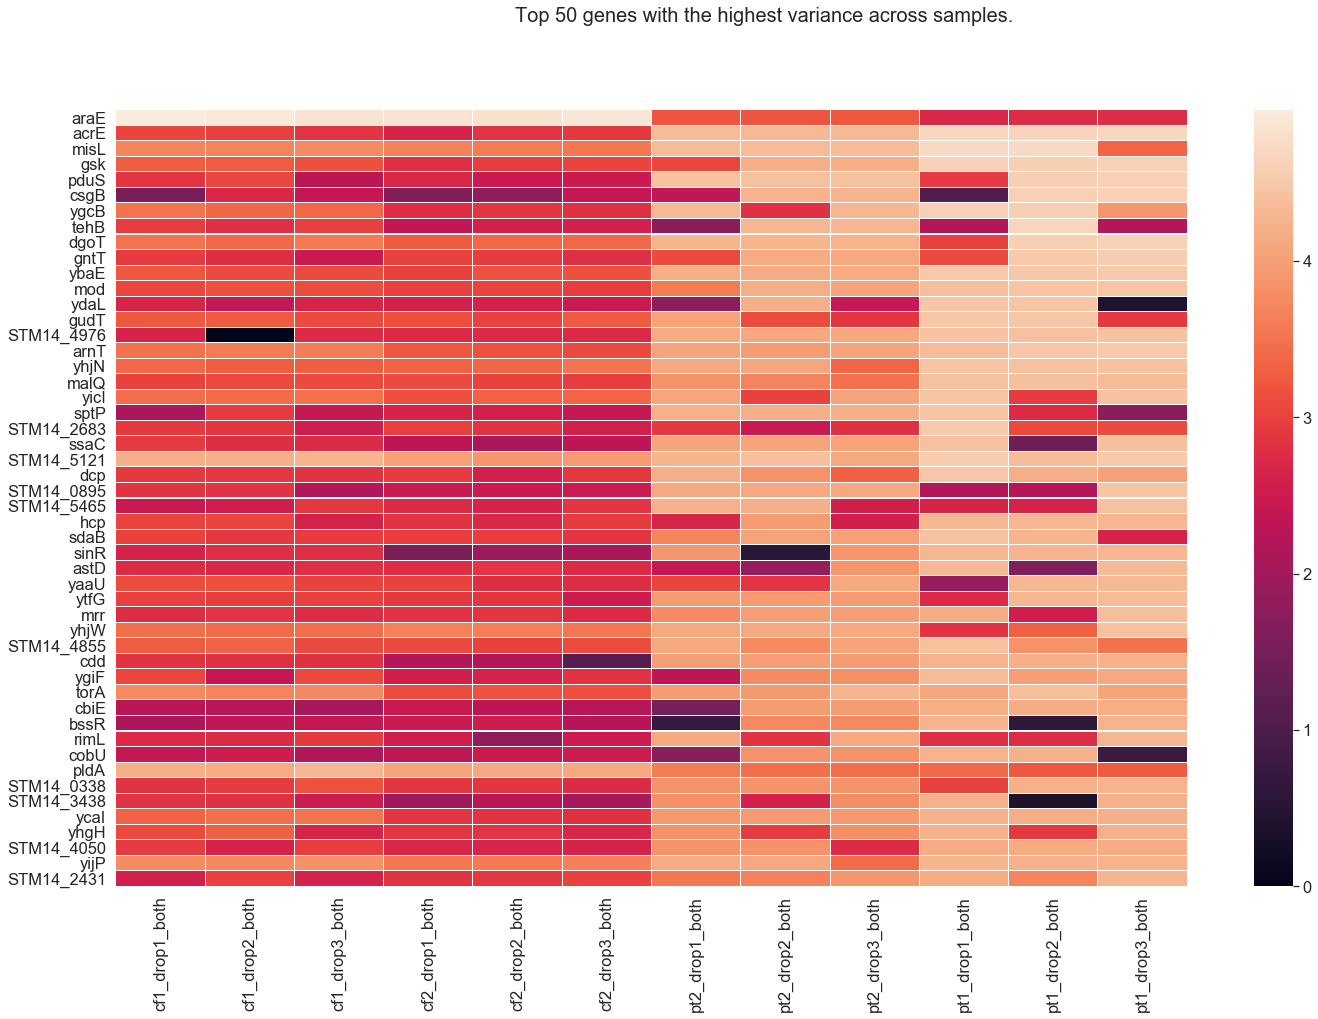

In [22]:
cols = read_columns  # group_columns, read_columns
top = 50

var = genehits[cols].var(axis=1).sort_values(ascending=False)
data = genehits.iloc[var[:top].index]
np_data = np.array(data[cols]+1)
np_data = np.log10(np_data)  # count data
print(np_data.shape)

size = (2*np_data.shape[1], min(40, np_data.shape[0]/3.5))
print("size :", size)
fig = plt.figure(figsize=size)  # w, h
fig.suptitle(f"Top {top} genes with the highest variance across samples.", fontsize=20)
ylabels = data["Gene_ID"] if len(np_data)<100 else False
lw = 0.05 if len(np_data)<100 else 0.0
ax = sn.heatmap(np_data,
# cmap='Blues',
xticklabels=cols,
yticklabels=ylabels,
linewidth=lw,
)
plt.savefig(f"{output_folder}/high_variance.png", bbox_inches="tight")
plt.show()

k=1 : sse=33054.000
k=2 : sse=24494.135
k=3 : sse=18629.698
k=4 : sse=14808.304
k=5 : sse=11602.780
k=6 : sse=9469.017
k=7 : sse=8134.862
k=8 : sse=7277.002
k=9 : sse=6606.687
k=10 : sse=6056.008


Text(0, 0.5, 'SSE')

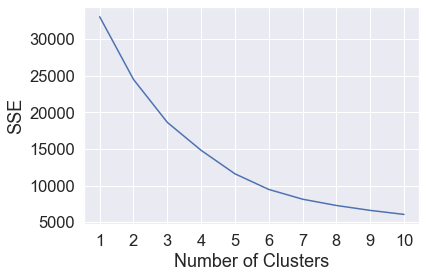

In [23]:
from sklearn.cluster import KMeans

cols = all_fc_cols  # group_columns, read_columns, all_fc_cols, first_fc_cols
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 42,
}
max_clusters = 11

data = genehits[cols]
# data = np.log10(genehits[cols].copy()+1)  # count data, avoid Nans
# Compute Softmax, makes the data a distribution
data = np.exp(data)
data /= np.sum(np.array(data), axis=1).reshape(-1,1)

scaled = whiten(data)

sse = []
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)
    print("k={} : sse={:.3f}".format(k, kmeans.inertia_))

plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

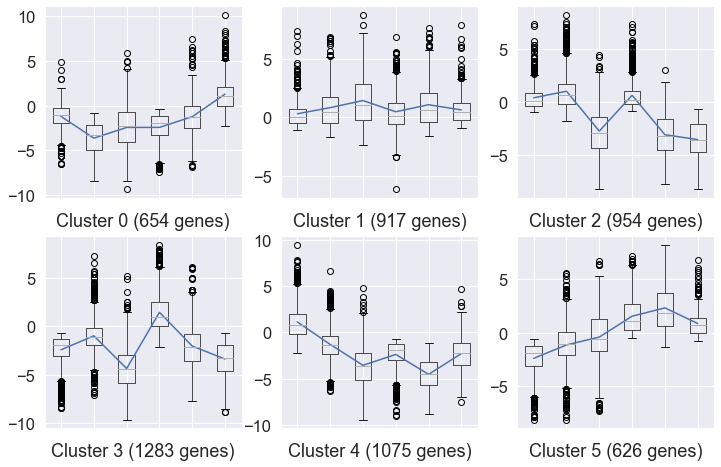

In [24]:
clusters = 6
scale = 4

kmeans = KMeans(n_clusters=clusters, **kmeans_kwargs)
kmeans.fit(scaled)
labels = kmeans.labels_
counts = np.bincount(labels)

cols = all_fc_cols  # group_columns, read_columns, all_fc_cols, first_fc_cols
rr = int(np.ceil(np.sqrt(clusters)))
fig = plt.figure(figsize=[scale*rr, scale*rr])
# fig.suptitle("Hits per TA site", fontsize=scale*8)
for i in range(clusters):
    fig.add_subplot(rr, rr, i+1)
    ax = plt.gca()
    subset = genehits[labels==i].copy().replace(0, np.NaN)[cols]
    # Use fold change
    subset.boxplot(column=cols, ax=ax, showfliers=True)
    ax.plot(range(1, 1+len(cols)), subset.mean(axis=0))
    # Use log10 for count data
    # np.log10(subset).boxplot(column=cols, ax=ax, showfliers=True)
    # ax.plot(range(1, 1+len(cols)), np.log10(subset).mean(axis=0))
    ax.set_xlabel(f"Cluster {i} ({counts[i]} genes)", fontsize=scale*4.5)
    ax.set_xticklabels([])
plt.savefig(f"{output_folder}/clusters.png", bbox_inches="tight")

In [25]:
gene_list = [
'mreB', 'sipA', 'sipC', 'ftsZ', 'ftsA', 'minC', 'minD', 'minE', 'STM14_3218',  # cytoskeleton proteins
]
# geneset = genehits[genehits["Gene_ID"].isin(gene_list)]  # Gene_ID, Locus_Tag
geneset = genehits[labels==0]  # Number from clustering
geneset

Gene_ID   Locus_Tag   Index    Start      End Direction  TA_Count  \
1     STM14_0015  STM14_0015  14028c    14845    14958         +         9   
15    STM14_0037  STM14_0037  14028c    32545    32994         -        39   
21    STM14_0043  STM14_0043  14028c    38773    39534         -        61   
24    STM14_0046  STM14_0046  14028c    42932    44185         +        64   
30    STM14_0062  STM14_0062  14028c    61106    61792         -        39   
...          ...         ...     ...      ...      ...       ...       ...   
5465        yrbE  STM14_4000  14028c  3492052  3492834         -        28   
5474        yrdC  STM14_4105  14028c  3587947  3588519         -        26   
5486        yshA  STM14_4829  14028c  4238594  4239286         -        76   
5493        ytfK  STM14_5292  14028c  4656215  4656421         +        12   
5505        znuC  STM14_2301  14028c  1998843  1999598         +        33   

      Gene_Length    GC  cf1_S3_L001_R1_001_forward  ...  t0_t3_Ratio_Reads  \
1             114  None                         108  ...           0.017011   
15            450  None                           1  ...           0.022272   
21            762  None                         686  ...           0.074080   
24           1254  None                         296  ...           0.899677   
30            687  None                         215  ...           0.443639   
...           ...   ...                         ...  ...                ...   
5465          783  None                         962  ...           0.025985   
5474          573  None                           1  ...           0.095396   
5486          693  None                           7  ...           0.377659   
5493          207  None                         206  ...           0.021588   
5505          756  None                         313  ...           0.015329   

      t0_t3_Log2FC_Reads  t1_t2_Ratio_Reads  t1_t2_Log2FC_Reads  \
1              -5.877420           0.382168           -1.387721   
15             -5.488629           0.034230           -4.868581   
21             -3.754764           0.336659           -1.570640   
24             -0.152521           0.486838           -1.038487   
30             -1.172542           0.526552           -0.925351   
...                  ...                ...                 ...   
5465           -5.266204           0.344841           -1.535995   
5474           -3.389931           0.598966           -0.739453   
5486           -1.404844           0.649902           -0.621705   
5493           -5.533596           0.043798           -4.513007   
5505           -6.027628           0.098825           -3.338984   

      t1_t3_Ratio_Reads  t1_t3_Log2FC_Reads  t2_t3_Ratio_Reads  \
1              0.244958           -2.029393           0.640969   
15             0.088443           -3.499108           2.583762   
21             0.859661           -0.218160           2.553508   
24             1.064194            0.089762           2.185933   
30             1.100838            0.138602           2.090652   
...                 ...                 ...                ...   
5465           0.213200           -2.229723           0.618254   
5474           0.598966           -0.739453           1.000000   
5486           4.772315            2.254689           7.343128   
5493           0.043441           -4.524786           0.991869   
5505           0.330571           -1.596966           3.345028   

      t2_t3_Log2FC_Reads       PC1       PC2  
1              -0.641673 -0.023836 -0.004355  
15              1.369473 -0.028171 -0.002015  
21              1.352481 -0.245683 -0.016480  
24              1.128249 -0.123139 -0.017260  
30              1.063953 -0.312591 -0.001918  
...                  ...       ...       ...  
5465           -0.693728 -0.308374 -0.047912  
5474            0.000000 -0.001957 -0.000328  
5486            2.876395 -0.104876  0.006236  
5493           -0.011779 -0.111687 -0.006672  
5505    

data : (654, 6)
size : (12, 30)


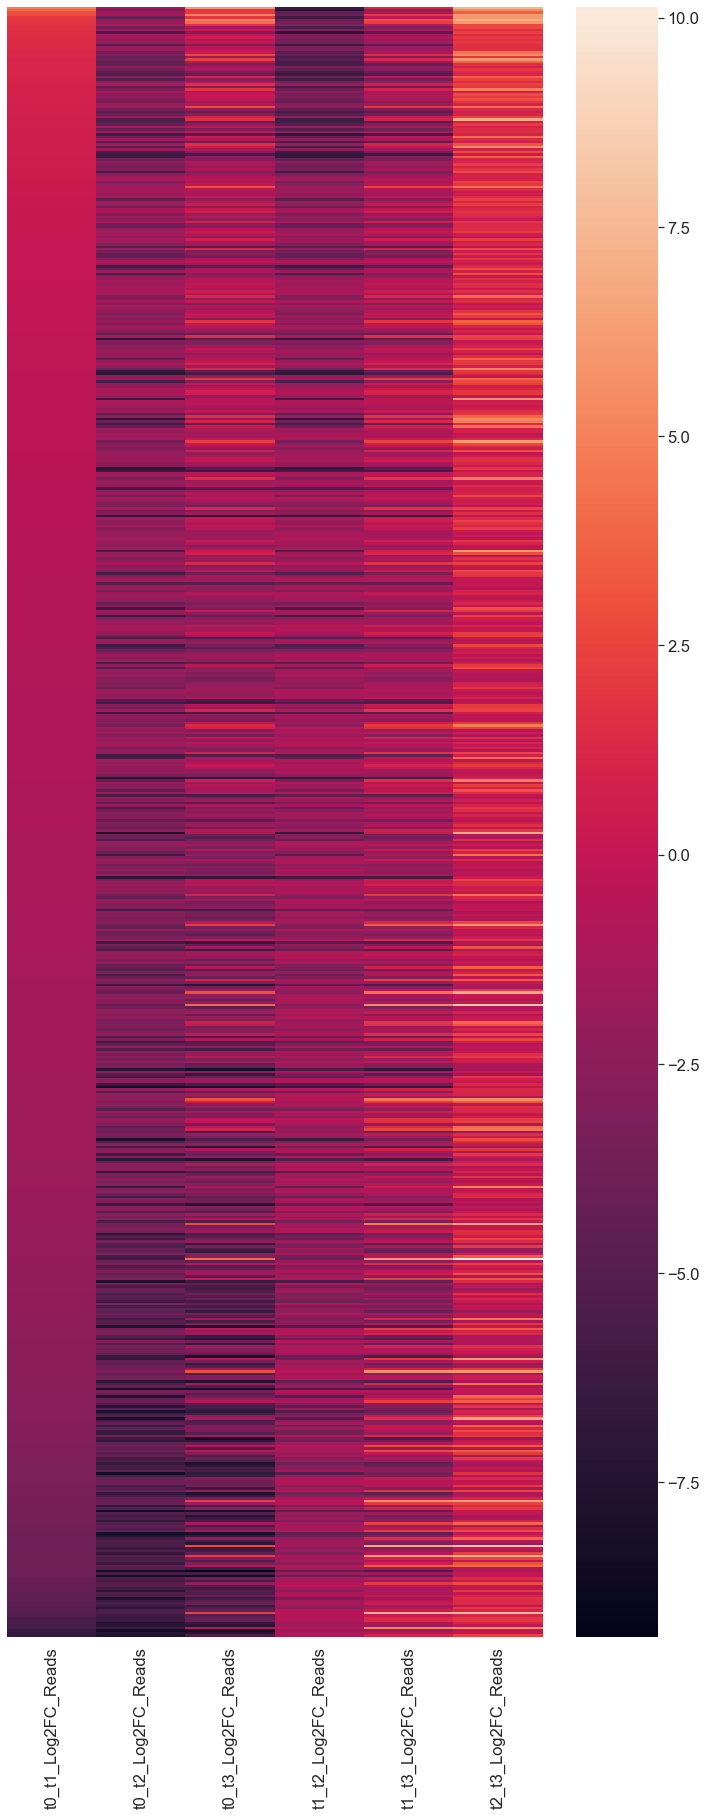

In [26]:
cols = all_fc_cols  # group_columns, read_columns, all_fc_cols, first_fc_cols

sort_by = cols[0]  # cols[0], Gene_Length, TA_Count
# data = geneset
data = geneset.sort_values(by=sort_by, ascending=False)
np_data = np.array(data[cols])
# np_data = np.log10(np_data+1)  # count data
print("data :", np_data.shape)

size = (2*np_data.shape[1], min(30, np_data.shape[0]/3.5))
print("size :", size)
plt.figure(figsize=size)  # w, h
ylabels = data["Gene_ID"] if len(np_data)<100 else False
lw = 0.05 if len(np_data)<100 else 0.0
ax = sn.heatmap(np_data,
# cmap='Blues',
xticklabels=cols,
yticklabels=ylabels,
linewidth=lw,
)
fig.tight_layout()
plt.savefig(f"{output_folder}/cluster_heatmap.png", bbox_inches="tight")

In [27]:
groups

{'t0': ['cf1_drop1_both', 'cf1_drop2_both', 'cf1_drop3_both'],
 't1': ['cf2_drop1_both', 'cf2_drop2_both', 'cf2_drop3_both'],
 't2': ['pt2_drop1_both', 'pt2_drop2_both', 'pt2_drop3_both'],
 't3': ['pt1_drop1_both', 'pt1_drop2_both', 'pt1_drop3_both']}

In [28]:
genehits.columns

Index(['Gene_ID', 'Locus_Tag', 'Index', 'Start', 'End', 'Direction',
       'TA_Count', 'Gene_Length', 'GC', 'cf1_S3_L001_R1_001_forward',
       'cf1_S3_L001_R1_001_reverse', 'cf1_S3_L001_R1_001_both',
       'cf2_S4_L001_R1_001_forward', 'cf2_S4_L001_R1_001_reverse',
       'cf2_S4_L001_R1_001_both', 'pt1_S1_L001_R1_001_forward',
       'pt1_S1_L001_R1_001_reverse', 'pt1_S1_L001_R1_001_both',
       'pt2_S2_L001_R1_001_forward', 'pt2_S2_L001_R1_001_reverse',
       'pt2_S2_L001_R1_001_both', 'cf1_drop1_both', 'cf1_drop2_both',
       'cf1_drop3_both', 'cf2_drop1_both', 'cf2_drop2_both', 'cf2_drop3_both',
       'pt1_drop1_both', 'pt1_drop2_both', 'pt1_drop3_both', 'pt2_drop1_both',
       'pt2_drop2_both', 'pt2_drop3_both', 't0', 't0_Unique_Insertions',
       't0_Diversity', 't1', 't1_Unique_Insertions', 't1_Diversity', 't2',
       't2_Unique_Insertions', 't2_Diversity', 't3', 't3_Unique_Insertions',
       't3_Diversity', 't0_t1_Ratio_Reads', 't0_t1_Log2FC_Reads',
       't0_t2_Ra

In [29]:
c = "t0_t1_Log2FC_Reads"
x = trimmed.sort_values(by=c, ascending=True)[["Gene_ID", c]]
print("Lowest :\n", x[:15])
print("Highest :\n", x[-15:])

Lowest :
          Gene_ID  t0_t1_Log2FC_Reads
3456        nhaA           -7.889235
4731        ychN           -7.786154
271   STM14_0777           -6.717678
3131        ilvY           -6.256397
2078  STM14_5410           -6.186657
2253        aroA           -6.180045
3497        nuoF           -6.170667
5351        yjjV           -6.127656
1542  STM14_3836           -6.111910
1608  STM14_4093           -6.087977
2032  STM14_5333           -5.940493
3773        ptxA           -5.762542
2443        coaA           -5.709881
964   STM14_2453           -5.689185
4825        ydiT           -5.680942
Highest :
          Gene_ID  t0_t1_Log2FC_Reads
4822        ydiQ            3.923070
4139        spaO            4.021913
1577  STM14_3960            4.071793
47    STM14_0101            4.083225
5443        yqiC            4.093272
3400        murG            4.157402
928   STM14_2389            4.182244
5480        yrfF            4.228429
3558        pagP            4.275113
4719        ycgL 

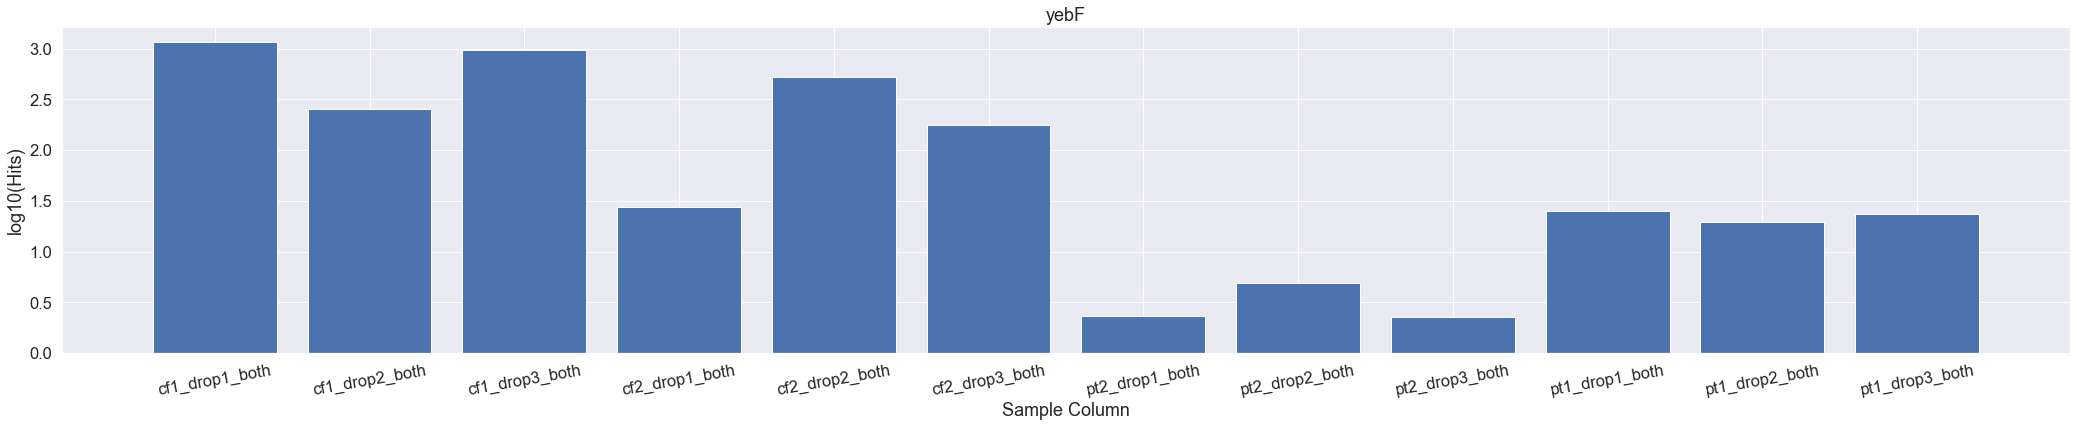

In [30]:
gene_name = "yebF"
cols = read_columns  # group_columns, read_columns, all_fc_cols, first_fc_cols

fig = plt.figure(figsize=[3*len(cols), 6])
ax = fig.add_subplot(111)
row = genehits[genehits["Gene_ID"]==gene_name]
ax.bar(cols, np.squeeze(np.log10(row[cols]+1)) )
plt.title(gene_name)
ax.set_xticklabels(cols, rotation=10)
ax.set_xlabel("Sample Column")
ax.set_ylabel("log10(Hits)")
plt.savefig(f"{output_folder}/gene_{gene_name}_bar.png", bbox_inches="tight")

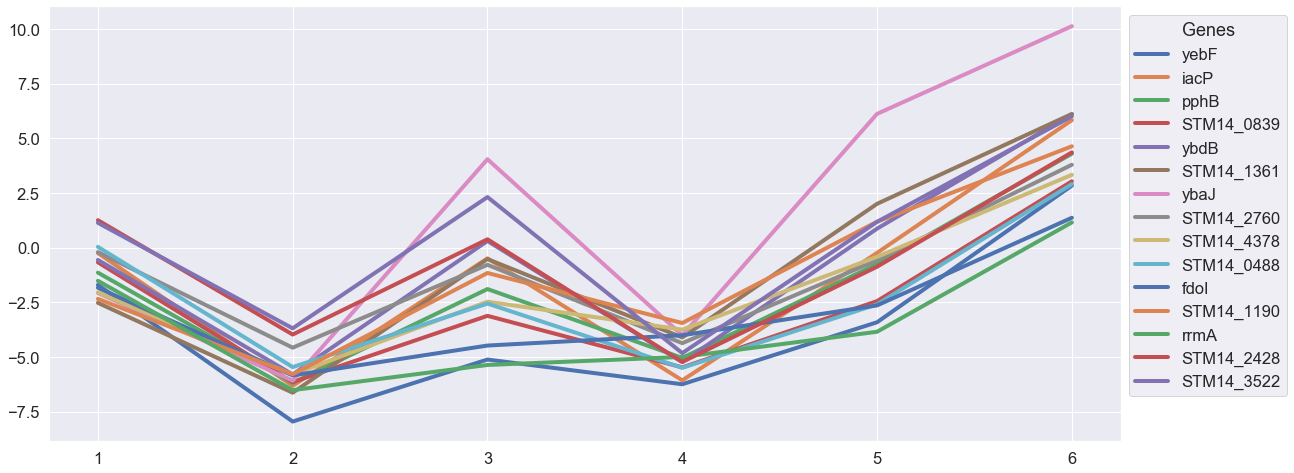

In [31]:
# Find similar genes by clustering
gene_name = "yebF"
top = 15
cols = all_fc_cols  # group_columns, read_columns, all_fc_cols, first_fc_cols

df = trimmed[cols].copy()
# df = np.log10(trimmed[cols].copy()+1)  # count data

# Compute Jensen-Shannon Distance
ps = np.exp(df)
ps /= np.sum(np.array(ps), axis=1).reshape(-1,1)
s = ps[trimmed["Gene_ID"]==gene_name]
df["JSD"] = (ps*np.log(ps/np.array(s))).sum(axis=1)
idxs = df["JSD"].sort_values(ascending=True)[:top].index
subset = genehits.iloc[idxs]

fig = plt.figure(figsize=(3.2*len(cols),8))
ax = fig.add_subplot(111)
for index, r in subset.iterrows():
    y = r[cols].astype(float)
    # y = np.log10(y+1)  # count data
    ax.plot(range(1,1+len(cols)), y, label=r["Gene_ID"], linewidth=4)

ax.legend(title='Genes', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig(f"{output_folder}/gene_{gene_name}_closest.png", bbox_inches="tight")

In [32]:
# Closet genes from above cell
subset[["Gene_ID"]+read_columns]

Gene_ID  cf1_drop1_both  cf1_drop2_both  cf1_drop3_both  \
4853        yebF     1145.981066      255.122092      966.366018   
3098        iacP       73.580752      325.125105      364.393831   
3701        pphB       82.974039      348.459443      359.578053   
291   STM14_0839       12.524383     1028.266481       11.236814   
4575        ybdB      344.420539      225.565264      181.394286   
478   STM14_1361      450.877796      395.128118      489.604046   
4548        ybaJ      410.173551      396.683741      370.814868   
1075  STM14_2760      200.390132      538.245390       19.263110   
1687  STM14_4378      345.986087      343.792575      354.762276   
196   STM14_0488      117.416093      247.343980      112.368142   
2702        fdoI      893.927853      704.696999     1030.576385   
420   STM14_1190      500.975329      597.359045      375.630645   
4004        rrmA      536.982931      524.244787      173.367990   
939   STM14_2428      255.184308       48.224298       30.499924   
1405  STM14_3522       72.015204       10.889358       54.578812   

      cf2_drop1_both  cf2_drop2_both  cf2_drop3_both  pt2_drop1_both  \
4853       26.224327      523.195317           174.0        1.341229   
3098      230.975802      180.795293           229.0        2.682458   
3701       96.828284      124.233637           135.0        2.682458   
291       182.561660      187.865500           288.0        4.023686   
4575      104.897308      215.136298           187.0        4.023686   
478        58.500422       58.581715           112.0        1.341229   
4548       75.647097      125.243666            76.0        4.023686   
1075      220.889523      177.765204           258.0       10.729830   
1687       85.733376       85.852513            78.0        6.706144   
196        64.552189      115.143371           309.0        2.682458   
2702      328.812714      307.048989            98.0        5.364915   
420       160.371845      109.083193            18.0        8.047373   
4004      135.156146      143.424199           150.0        2.682458   
939       256.191501       47.471390           497.0        8.047373   
1405      145.242426       10.100296           150.0        2.682458   

      pt2_drop2_both  pt2_drop3_both  pt1_drop1_both  pt1_drop2_both  \
4853        3.898524        1.286340       24.295556       18.375281   
3098        1.299508        2.572680      184.646222      174.565166   
3701        2.599016        2.572680        4.859111      200.596813   
291         5.198032        2.572680       59.929037       56.657115   
4575        3.898524        2.572680      319.081629      303.192130   
478         7.797047        1.286340        1.619704        1.531273   
4548        3.898524        6.431700    10008.149163     9463.269515   
1075        9.096555        9.004381      221.899407        1.531273   
1687        1.299508        7.718040        1.619704      183.752806   
196         2.599016        2.572680        0.000000       38.281835   
2702        3.898524       33.444842       21.056148       50.532022   
420         7.797047        7.718040      657.599702        0.000000   
4004        5.198032        2.572680        9.718222        9.187640   
939         3.898524        6.431700       38.872889      396.599807   
1405        2.599016        2.572680      234.857037      225.097187   

      pt1_drop3_both  
4853       22.404339  
3098      182.435335  
3701        4.800930  
291         1.600310  
4575      305.659201  
478       924.979154  
4548        3.200620  
1075      214.441534  
1687        0.000000  
196        40.007749  
2702       43.208369  
420         0.000000  
4004        8.001550  
939         0.000000  
1405      235.245563

In [56]:
trimmed["P_Value"] = np.nan
trimmed["P_Sig"] = False

In [57]:
c = 0  # genes counter, this is different than the index value

In [66]:
from zinb_glm import zinb_glm_llr
from util import time_to_string

debug = False
leave = 10000
use_genehits = True

# cols, base_condition = group_columns, list(range(len(group_columns)))  # group_columns

cols, base_condition = read_columns, [i for i,v in enumerate(groups.values()) for j in range(len(v))]  # read_columns

nzmean = np.array( genehits[cols].replace(0, np.NaN).mean() )
diversity = np.array( tamap[cols].astype(bool).sum()/len(tamap) )
print(" * Calculating statistical significance...")
t0 = time.time()
for i in trimmed.index[c:]:
    try:
        c += 1
        if c%10==0:
            duration = time.time()-t0
            remaining = duration/c * (len(trimmed)-c)
            print("gene {}/{}. {:.1f} genes/second. elapsed={}. remaining={}.".format(c, len(trimmed), c/duration, time_to_string(duration), time_to_string(remaining)))

        if use_genehits:
            df = trimmed.loc[i]
            gene_data = np.array(df[cols]).T.reshape(-1)
            conditions = base_condition
            pvalue = zinb_glm_llr(gene_data, conditions, nzmean, dist="nb", debug=debug)
        else:
            gene_name, size = trimmed.loc[i][["Gene_ID", "TA_Count"]]
            df = tamap[tamap["Gene_ID"]==gene_name]
            gene_data = np.array(df[cols]).T.reshape(-1)
            conditions = [i for i in base_condition for j in range(size)]
            pvalue = zinb_glm_llr(gene_data, conditions, nzmean, diversity, dist="nb",debug=debug)

        trimmed.loc[i, "P_Value"] = pvalue
        if c > leave: break
    except KeyboardInterrupt:
        break
duration = time.time()-t0
remaining = duration/c * (len(trimmed)-c)
print("gene {}/{}. {:.1f} genes/second. elapsed={}. remaining={}.".format(c, len(trimmed), c/duration, time_to_string(duration), time_to_string(remaining)))
trimmed["P_Sig"] = np.logical_and(trimmed["P_Value"]<0.05, trimmed["P_Value"]!=0)
pv = trimmed["P_Value"]
trimmed["Log10P"] = -np.log10(pv, out=np.zeros_like(pv), where=(pv!=0))

aining=4.06 minutes.
gene 890/3354. 10.1 genes/second. elapsed=1.47 minutes. remaining=4.06 minutes.
gene 900/3354. 10.1 genes/second. elapsed=1.49 minutes. remaining=4.06 minutes.
gene 910/3354. 10.1 genes/second. elapsed=1.51 minutes. remaining=4.05 minutes.
gene 920/3354. 10.0 genes/second. elapsed=1.53 minutes. remaining=4.05 minutes.
gene 930/3354. 10.0 genes/second. elapsed=1.55 minutes. remaining=4.04 minutes.
gene 940/3354. 10.0 genes/second. elapsed=1.57 minutes. remaining=4.04 minutes.
gene 950/3354. 9.9 genes/second. elapsed=1.59 minutes. remaining=4.03 minutes.
gene 960/3354. 9.9 genes/second. elapsed=1.62 minutes. remaining=4.03 minutes.
gene 970/3354. 9.9 genes/second. elapsed=1.64 minutes. remaining=4.02 minutes.
gene 980/3354. 9.9 genes/second. elapsed=1.66 minutes. remaining=4.01 minutes.
gene 990/3354. 9.8 genes/second. elapsed=1.68 minutes. remaining=4.02 minutes.
gene 1000/3354. 9.8 genes/second. elapsed=1.70 minutes. remaining=4.01 minutes.
gene 1010/3354. 9.8 gene

In [67]:
from util import bh_procedure
sig_genes = trimmed["P_Sig"].sum()
print("Significant p-values : {} ({:.2f}%)".format(sig_genes, 100*sig_genes/len(trimmed)))
print("Genes not tested : {}".format(np.sum(np.isnan(trimmed["P_Value"]))))
fails = np.sum(trimmed["P_Value"]==0)
print("Test failures : {} ({:.2f}%)".format(fails, 100*fails/len(trimmed)))
qvalues, new_alpha = bh_procedure(np.nan_to_num(trimmed["P_Value"]))
print("New Alpha :", new_alpha)
qvalues[qvalues==0] = np.nan
trimmed["Q_Value"] = qvalues
trimmed["Q_Sig"] = np.logical_and(trimmed["Q_Value"]<0.05, trimmed["Q_Value"]!=0)
trimmed["Log10Q"] = -np.log10(qvalues, out=np.zeros_like(qvalues), where=(qvalues!=0))
sig_genes = trimmed["Q_Sig"].sum()
print("Significant q-values : {} ({:.2f}%)".format(sig_genes, 100*sig_genes/len(trimmed)))

Significant p-values : 2847 (84.88%)
Genes not tested : 0
Test failures : 9 (0.27%)
New Alpha : 0.04161690263865227
Significant q-values : 2787 (83.09%)


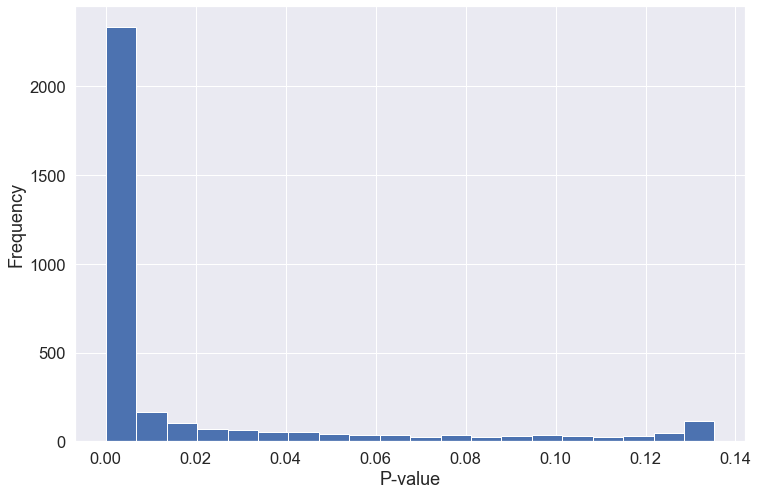

In [68]:
bins = 20
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111) 
df = trimmed["P_Value"].replace(0, np.nan)
df.plot.hist(bins=bins, ax=ax)
ax.set_xlabel("P-value")
plt.savefig(f"{output_folder}/pvalue_histogram.png", bbox_inches="tight")

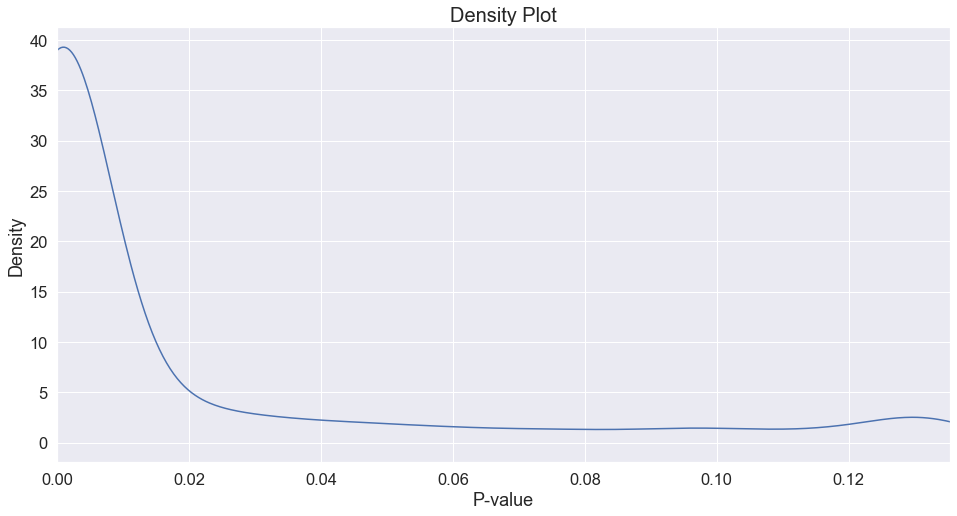

In [69]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111) 
ax.set_xlabel("P-value")
ax.set_title("Density Plot", fontsize=20)
df = trimmed["P_Value"].copy().replace(0, np.nan)
df.plot.kde(ax=ax)
ax.set_xlim([0,min(1,df.max())])
plt.savefig(f"{output_folder}/pvalue_density.png", bbox_inches="tight")

In [70]:
check = "Log2FC_Reads"
[x for x in trimmed.columns if x[-len(check):]==check]

['t0_t1_Log2FC_Reads',
 't0_t2_Log2FC_Reads',
 't0_t3_Log2FC_Reads',
 't1_t2_Log2FC_Reads',
 't1_t3_Log2FC_Reads',
 't2_t3_Log2FC_Reads']

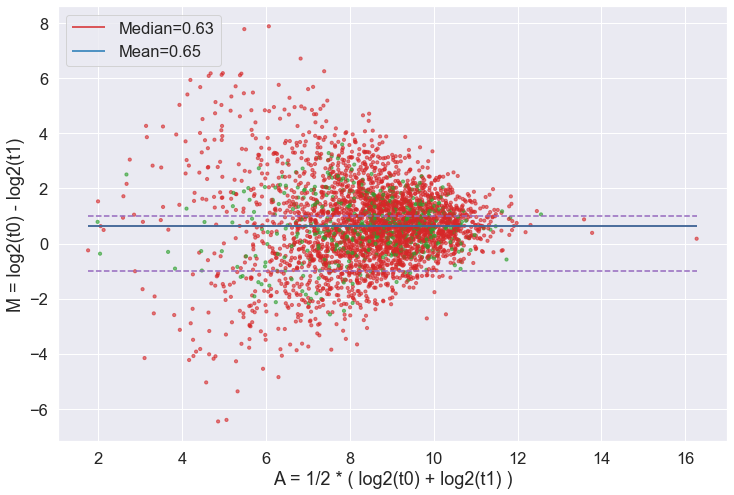

In [71]:
sample = "t0"
control = "t1"
smoothing = 1
color_map = trimmed["P_Sig"].map({False:'tab:green', True:'tab:red'})

fig = plt.figure(figsize=[12, 8])
A = 0.5*(np.log2(trimmed[sample]+smoothing)+np.log2(trimmed[control]+smoothing))
M = np.log2((trimmed[sample]+smoothing)/(trimmed[control]+smoothing))
plt.scatter(x=A, y=M, s=10, alpha=0.6, color=color_map)
plt.hlines(M.median(), xmin=A.min(), xmax=A.max(), color="tab:red", label="Median={:.2f}".format(M.median()))
plt.hlines(M.mean(), xmin=A.min(), xmax=A.max(), color="tab:blue", label="Mean={:.2f}".format(M.mean()))
plt.hlines([-1, 1], xmin=A.min(), xmax=A.max(), color="tab:purple", linestyle='dashed')
plt.legend(loc="upper left")
plt.xlabel(f"A = 1/2 * ( log2({sample}) + log2({control}) )")
plt.ylabel(f"M = log2({sample}) - log2({control})")
plt.savefig(f"{output_folder}/MA_Plot.png", bbox_inches="tight")

C:\Users\Luke A Sargen\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '-log10(P_Value)')

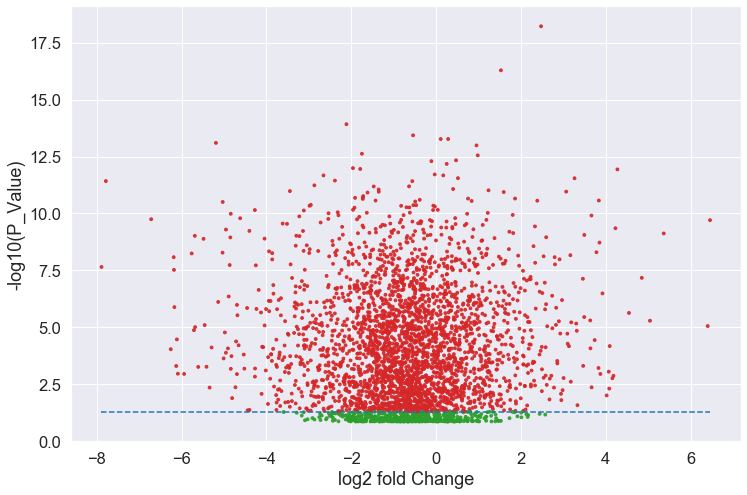

In [72]:
col = "P_Value"
color_map = trimmed["P_Sig"].map({False:'tab:green', True:'tab:red'})
X = trimmed["t0_t1_Log2FC_Reads"]

Y = -np.log10(trimmed[col])
fig = plt.figure(figsize=[12, 8])
plt.scatter(x=X, y=Y, s=8, alpha=0.9, color=color_map)
plt.hlines(-np.log10(0.05), xmin=X.min(), xmax=X.max(), color="tab:blue", linestyle='dashed')
plt.vlines([-1, 1], ymin=Y.min(), ymax=Y.max(), color="tab:blue", linestyle='dashed')
plt.xlabel("log2 fold Change")
plt.ylabel(f"-log10({col})")
# plt.ylim(0, min(30, Y.max()))
# plt.savefig(f"{output_folder}/Volcano_Plot_{col}.png", bbox_inches="tight")